In [1]:
import matplotlib.pyplot as plt
from IPython.display import Image
from molecular_simulations.utils import writeXYZ
from molecular_simulations.lj_mc_nvt import lj_nvt
import numpy as np

In [2]:
N = 500
rho = 0.8
T = 2.0
delta = 0.25
pos, u, vr = lj_nvt(N, rho, T, delta, eqnum=100, snum=1000)
P = rho * T + vr / (3 * N / rho)

Equi Step: 100/100 Step: 0.24 Acc: 0.51


In [3]:
def plot_samples(u: np.ndarray, label: str):
    _, axs = plt.subplots(1, 2, figsize=(10, 5), tight_layout=True)
    axs[0].plot(u)
    axs[0].set_xlabel("Steps")
    axs[0].set_ylabel(label)

    # add a 'best fit' line to the histogram
    u = np.sort(u)
    mu, sigma = u.mean(), u.std()
    y = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(
        -0.5 * (1 / sigma * (np.sort(u) - mu)) ** 2
    )

    textstr = "\n".join([r"$\mu=%.2f$" % (mu,), r"$\sigma=%.2f$" % (sigma,)])
    props = dict(boxstyle="round", facecolor="w", alpha=0.5)

    axs[1].hist(u, density=True)
    axs[1].plot(u, y, "--")
    axs[1].set_xlabel(label)
    # place a text box in upper left in axes coords
    axs[1].text(
        0.05,
        0.95,
        textstr,
        transform=axs[1].transAxes,
        fontsize=14,
        verticalalignment="top",
        bbox=props,
    )
    plt.show()


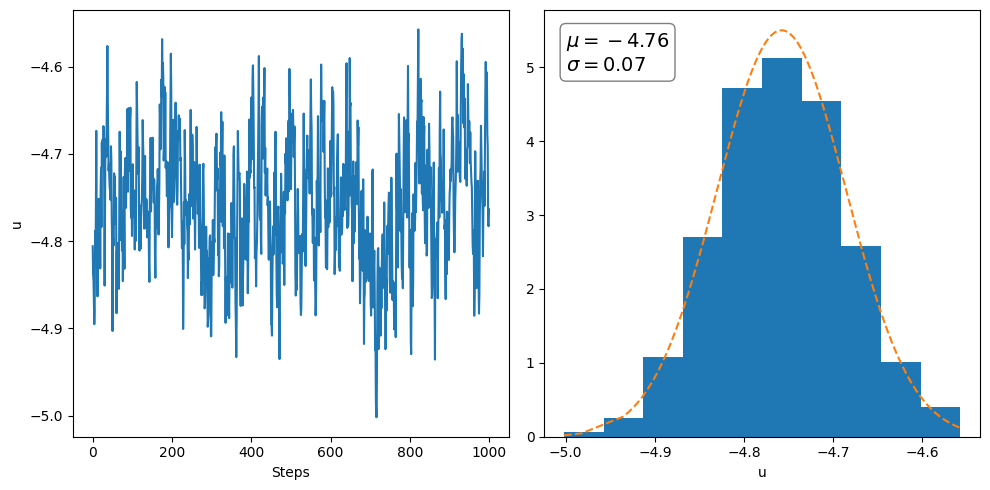

In [4]:
plot_samples(u, "u")

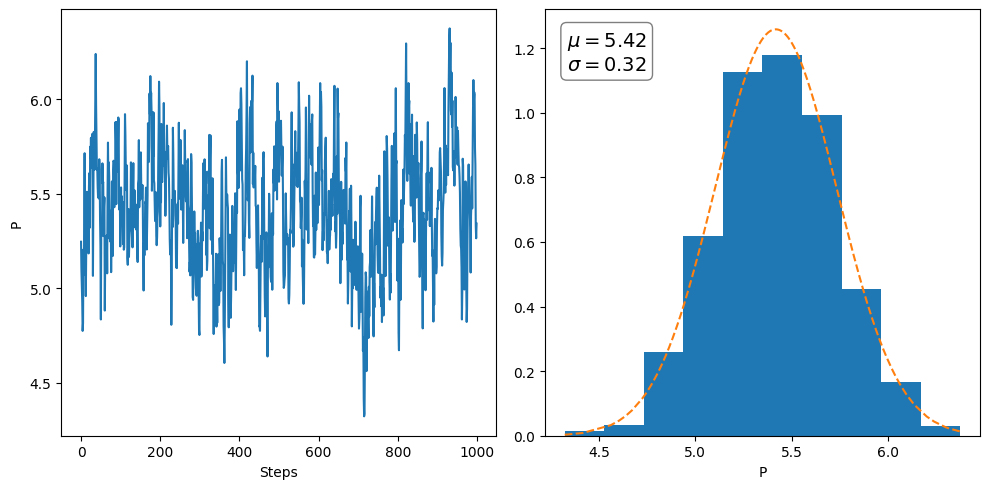

In [5]:
plot_samples(P, "P")

In [6]:
# Write to XYZ format
writeXYZ(pos, '../data/lj_mc_nvt_snapshot.xyz')

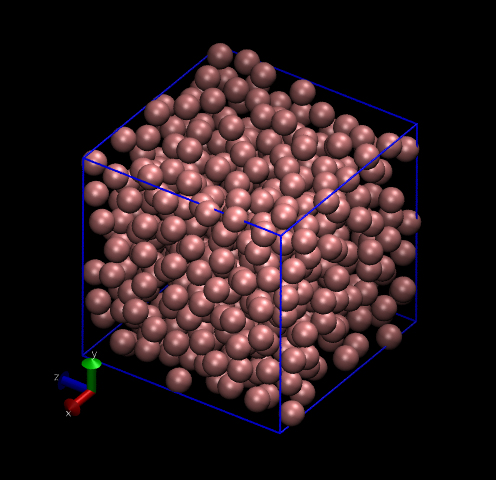

In [7]:
# Rendering of the XYZ snapshot with VMD
Image('../data/lj_md_nve_snap.png')